# Import Libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
import math
import torch

# Ptanh

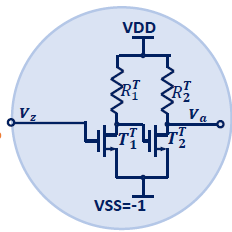

### Read Data

Faulty Circuit

In [18]:
ftanh_data = pandas.read_csv('./v3_SimulationDataset/single_fault/faulty/ptanh_faulty_vout.csv')
ftanh_data

,X,M1_G-D_short,M1_G-S_short,M2_G-D_short,M2_G-S_short,R1_open,R1_short,R2_short,M1_open,M2_open,M1_D-S_short,/Vout,M2_D-S_short,R2_open
0,-2.000,0.999850,-0.905981,-0.605858,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,-0.907619,-1,-31.4876
1,-1.999,0.999850,-0.905983,-0.605864,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,-0.907619,-1,-31.4876
2,-1.998,0.999850,-0.905985,-0.605864,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,-0.907619,-1,-31.4876
3,-1.997,0.999850,-0.905986,-0.605864,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,-0.907619,-1,-31.4876
4,-1.996,0.999850,-0.905988,-0.605864,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,-0.907619,-1,-31.4876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1.996,-0.916587,-0.911841,-0.649817,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,0.999615,-1,-10.7499
3997,1.997,-0.916592,-0.911845,-0.649829,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,0.999616,-1,-10.7026
3998,1.998,-0.916597,-0.911849,-0.649840,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,0.999616,-1,-10.6552
3999,1.999,-0.916601,-0.911853,-0.649852,0.99985,0.99985,-0.910357,1,-0.910357,1,0.99985,0.999617,-1,-10.6077


Non Faulty Circuit

In [12]:
nftanh_data = pandas.read_csv('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/p-tanh_non-faulty_vout.csv')
nftanh_data

,vin,/Vout_robust (V)
0,-2.000,-0.8573
1,-1.999,-0.8573
2,-1.998,-0.8573
3,-1.997,-0.8573
4,-1.996,-0.8573
...,...,...
3997,1.997,0.9995
3998,1.998,0.9995
3999,1.999,0.9995
4000,2.000,0.9995


### Remove vout column

Vout is correct output without any fault

Faulty Circuit

In [19]:
ftanh_data.columns = ftanh_data.columns.str.strip()
ftanh_data.columns

Index(['X', 'M1_G-D_short', 'M1_G-S_short', 'M2_G-D_short', 'M2_G-S_short',
       'R1_open', 'R1_short', 'R2_short', 'M1_open', 'M2_open', 'M1_D-S_short',
       '/Vout', 'M2_D-S_short', 'R2_open'],
      dtype='object')

In [20]:
'/Vout' in ftanh_data.columns


True

In [21]:
ftanh_data.drop('/Vout', axis=1, inplace=True)
'/Vout' in ftanh_data.columns

False

In [22]:
ftanh_data.columns

Index(['X', 'M1_G-D_short', 'M1_G-S_short', 'M2_G-D_short', 'M2_G-S_short',
       'R1_open', 'R1_short', 'R2_short', 'M1_open', 'M2_open', 'M1_D-S_short',
       'M2_D-S_short', 'R2_open'],
      dtype='object')

12 differnt states if fault happend to tanh

In [6]:
a = torch.tensor(ftanh_data.to_numpy())[:,1:]
a.shape

torch.Size([4001, 12])

Non Faulty Circuit

In [14]:
nftanh_a = torch.tensor(nftanh_data.to_numpy())[:-1,1:]
nftanh_a.shape

torch.Size([4001, 1])

### Save Data

Faulty Circuit

In [7]:
torch.save(a, './v3_SimulationDataset/single_fault/faulty/ptanh_fault.data')

Non Faulty Circuit

In [16]:
torch.save(nftanh_a, './v3_SimulationDataset/single_fault/non-faulty_curves_for_both/nptanh_fault.data')

# ReLU

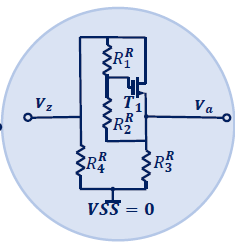

## Faulty Circuit

### Read Data

In [3]:
fdata_relu = pandas.read_csv('./v3_SimulationDataset/single_fault/faulty/p-ReLU_fault_vout.csv')
fdata_relu

,X,robust_vout,R1_short,R1_open,R3_short,R2_open,R3_open,R4_open,R2_short,G-D short(output_correct),G-S short,D-S short,Transistor-open,R4_short
0,-2.000,-0.0389,-0.0279,-1.2580,-1.302,-0.0123,-0.0123,-0.0123,-0.0123,-0.0279,-1.301,-2.000,-2.000,-2.000
1,-1.999,-0.0388,-0.0279,-1.2570,-1.301,-0.0123,-0.0123,-0.0123,-0.0123,-0.0279,-1.300,-1.999,-1.999,-1.999
2,-1.998,-0.0388,-0.0279,-1.2560,-1.300,-0.0123,-0.0123,-0.0123,-0.0123,-0.0279,-1.300,-1.998,-1.998,-1.998
3,-1.997,-0.0388,-0.0279,-1.2560,-1.300,-0.0123,-0.0123,-0.0123,-0.0123,-0.0279,-1.299,-1.997,-1.997,-1.997
4,-1.996,-0.0388,-0.0279,-1.2550,-1.299,-0.0123,-0.0123,-0.0123,-0.0123,-0.0279,-1.298,-1.996,-1.996,-1.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,1.997,1.0810,1.2580,0.0131,0.373,1.2570,1.2570,1.2570,1.2570,1.2580,0.373,1.997,1.997,1.997
3998,1.998,1.0810,1.2590,0.0131,0.373,1.2570,1.2570,1.2570,1.2570,1.2590,0.373,1.998,1.998,1.998
3999,1.999,1.0820,1.2600,0.0131,0.374,1.2580,1.2580,1.2580,1.2580,1.2600,0.374,1.999,1.999,1.999
4000,2.000,1.0830,1.2600,0.0131,0.374,1.2590,1.2590,1.2590,1.2590,1.2600,0.374,2.000,2.000,2.000


### Remove vout column

Vout is correct output without any fault

In [5]:
fdata_relu.columns = fdata_relu.columns.str.strip()
fdata_relu.columns

Index(['X', 'robust_vout', 'R1_short', 'R1_open', 'R3_short', 'R2_open',
       'R3_open', 'R4_open', 'R2_short', 'G-D short(output_correct)',
       'G-S short', 'D-S short', 'Transistor-open', 'R4_short'],
      dtype='object')

In [7]:
'robust_vout' in fdata_relu.columns


True

In [8]:
fdata_relu.drop('robust_vout', axis=1, inplace=True)
'robust_vout' in fdata_relu.columns

False

In [18]:
fdata_relu.columns

Index(['X', 'R1_short', 'R1_open', 'R3_short', 'R2_open', 'R3_open', 'R4_open',
       'R2_short', 'G-D short(output_correct)', 'G-S short', 'D-S short',
       'Transistor-open', 'R4_short'],
      dtype='object')

12 differnt states if fault happend to relu

In [9]:
fa_relu = torch.tensor(fdata_relu.to_numpy())[:,1:]
fa_relu.shape

torch.Size([4002, 12])

### Save Data

In [10]:
torch.save(fa_relu, './v3_SimulationDataset/single_fault/faulty/p-ReLU_fault.data')

## Non Faulty Circuit

### Read Data

In [14]:
nf_relu_data = pandas.read_csv('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/p-relu_non-faulty_vout.csv')
nf_relu_data

,In1,/vout_faulty (V)
0,-2.000,-0.04901
1,-1.999,-0.04898
2,-1.998,-0.04895
3,-1.997,-0.04891
4,-1.996,-0.04888
...,...,...
3997,1.997,1.24000
3998,1.998,1.24000
3999,1.999,1.24100
4000,2.000,1.24200


In [15]:
nf_relu_a = torch.tensor(nf_relu_data.to_numpy())[:-1,1:]
nf_relu_a.shape

torch.Size([4001, 1])

### Save Data

In [16]:
torch.save(nf_relu_a, './v3_SimulationDataset/single_fault/non-faulty_curves_for_both/nprelu_fault.data')

# Clip ReLU

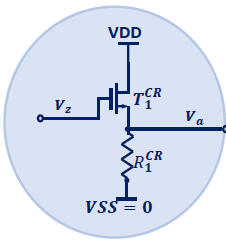

### Read Data

In [3]:
fdata_cr = pandas.read_csv('./v3_SimulationDataset/single_fault/faulty/p-CR_fault_vout.csv')
fdata_cr

,X,robust_vout,R-open_(Vt shift),R_Short,G-D short,G-S short,D-S short
0,-2.000,7.800000e-18,0.000000e+00,3.900000e-23,7.800000e-18,-2.000,1
1,-1.999,8.140000e-18,2.160000e-15,4.070000e-23,8.140000e-18,-1.999,1
2,-1.998,8.470000e-18,4.330000e-15,4.240000e-23,8.470000e-18,-1.998,1
3,-1.997,8.810000e-18,6.490000e-15,4.400000e-23,8.810000e-18,-1.997,1
4,-1.996,9.140000e-18,8.650000e-15,4.570000e-23,9.140000e-18,-1.996,1
...,...,...,...,...,...,...,...
3996,1.996,9.833038e-01,9.999966e-01,3.214190e-04,9.833038e-01,1.996,1
3997,1.997,9.833099e-01,9.999966e-01,3.215100e-04,9.833099e-01,1.997,1
3998,1.998,9.833160e-01,9.999966e-01,3.216010e-04,9.833160e-01,1.998,1
3999,1.999,9.833221e-01,9.999966e-01,3.216920e-04,9.833221e-01,1.999,1


### Remove vout column

Vout is correct output without any fault

In [4]:
fdata_cr.columns = fdata_cr.columns.str.strip()
fdata_cr.columns

Index(['X', 'robust_vout', 'R-open_(Vt shift)', 'R_Short', 'G-D short',
       'G-S short', 'D-S short'],
      dtype='object')

In [5]:
if 'robust_vout' in fdata_cr.columns:
    fdata_cr.drop('robust_vout', axis=1, inplace=True)
'robust_vout' in fdata_cr.columns


False

In [6]:
fdata_cr.columns

Index(['X', 'R-open_(Vt shift)', 'R_Short', 'G-D short', 'G-S short',
       'D-S short'],
      dtype='object')

6 differnt states if fault happend to clip relu

In [6]:
a = torch.tensor(fdata_cr.to_numpy())[:,1:]
a.shape

torch.Size([4001, 5])

### Save Data

In [7]:
torch.save(a, './v3_SimulationDataset/single_fault/faulty/p-CP_fault.data')

## Non Faulty Circuit

### Read Data

In [8]:
nf_cr_data = pandas.read_csv('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/p-CR_non-faulty_vout.csv')
nf_cr_data

,In2,/Out (V)
0,-2.000,4.042000e-14
1,-1.999,3.992000e-14
2,-1.998,3.941000e-14
3,-1.997,3.891000e-14
4,-1.996,3.840000e-14
...,...,...
3997,1.997,9.708000e-01
3998,1.998,9.708000e-01
3999,1.999,9.708000e-01
4000,2.000,9.708000e-01


In [9]:
nf_cr_a = torch.tensor(nf_cr_data.to_numpy())[:-1,1:]
nf_cr_a.shape

torch.Size([4001, 1])

### Save Data

In [10]:
torch.save(nf_cr_a, './v3_SimulationDataset/single_fault/non-faulty_curves_for_both/npcr_fault.data')

# Sigmoid

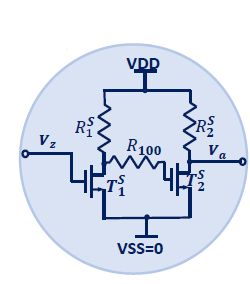

## Faulty Circuit

### Read Data

In [5]:
fdata_sigm = pandas.read_csv('./v3_SimulationDataset/single_fault/faulty/p-sigm_faulty_vout.csv')
fdata_sigm

,X,/Vout Y,/Vout Y.1,/Vout Y.2,/Vout Y.3,/Vout Y.4,/Vout Y.5,/Vout Y.6,/Vout Y.7,/Vout Y.8,/Vout Y.9,/Vout Y.10,/Vout Y.11,/Vout Y.12,/Vout Y.13
0,-2.000,0.055488,0.99985,0.053625,-30.48722949,1,0.99985,0.055488,0.99985,0.99985,0.99985,0.002536,0.315884,0.99985,0.053625
1,-1.999,0.055488,0.99985,0.053625,-30.48722949,1,0.99985,0.055488,0.99985,0.99985,0.99985,0.002536,0.315883,0.99985,0.053625
2,-1.998,0.055488,0.99985,0.053625,-30.48722949,1,0.99985,0.055488,0.99985,0.99985,0.99985,0.002536,0.315883,0.99985,0.053625
3,-1.997,0.055488,0.99985,0.053625,-30.48722949,1,0.99985,0.055488,0.99985,0.99985,0.99985,0.002536,0.315883,0.99985,0.053625
4,-1.996,0.055488,0.99985,0.053625,-30.48722949,1,0.99985,0.055488,0.99985,0.99985,0.99985,0.002536,0.315883,0.99985,0.053625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1.996,0.999848,0.99985,0.057444,,1,0.99985,0.999848,0.05285,0.99985,0.99985,0.002762,0.260103,0.99985,0.057444
3997,1.997,0.999848,0.99985,0.057445,,1,0.99985,0.999848,0.05285,0.99985,0.99985,0.002762,0.260088,0.99985,0.057445
3998,1.998,0.999848,0.99985,0.057446,,1,0.99985,0.999848,0.05285,0.99985,0.99985,0.002762,0.260073,0.99985,0.057446
3999,1.999,0.999848,0.99985,0.057448,,1,0.99985,0.999848,0.05285,0.99985,0.99985,0.002762,0.260058,0.99985,0.057448


In [30]:
fdata_sigm = pandas.read_excel('./v3_SimulationDataset/single_fault/faulty/With header/p-sigm_faulty_vout.xlsx')
fdata_sigm

,X,R1_short,M1_G-D,M1_G-S,R2_open,R1_open,M1_D-S,M2_open,M1_open,R3_short,R3_open,R2_short,M2_G-S,M2_G-D,M2_D-S
0,-2.000,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315884,-2.75,0.000043
1,-1.999,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
2,-1.998,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
3,-1.997,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
4,-1.996,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,1.997,0.999848,0.005982,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260088,-2.75,0.000270
3998,1.998,0.999848,0.005986,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260073,-2.75,0.000270
3999,1.999,0.999848,0.005990,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260058,-2.75,0.000270
4000,2.000,0.999848,0.005995,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260043,-2.75,0.000270


In [31]:
fdata_sigm = fdata_sigm.applymap(lambda x: x.strip() if isinstance(x, str) else x)
fdata_sigm

/scratch/ipykernel_336905/3081503832.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fdata_sigm = fdata_sigm.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,X,R1_short,M1_G-D,M1_G-S,R2_open,R1_open,M1_D-S,M2_open,M1_open,R3_short,R3_open,R2_short,M2_G-S,M2_G-D,M2_D-S
0,-2.000,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315884,-2.75,0.000043
1,-1.999,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
2,-1.998,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
3,-1.997,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
4,-1.996,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,1.997,0.999848,0.005982,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260088,-2.75,0.000270
3998,1.998,0.999848,0.005986,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260073,-2.75,0.000270
3999,1.999,0.999848,0.005990,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260058,-2.75,0.000270
4000,2.000,0.999848,0.005995,0.005362,,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260043,-2.75,0.000270


In [33]:
fdata_sigm.replace('', np.nan, inplace=True)
fdata_sigm

/scratch/ipykernel_336905/3963362565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fdata_sigm.replace('', np.nan, inplace=True)


,X,R1_short,M1_G-D,M1_G-S,R2_open,R1_open,M1_D-S,M2_open,M1_open,R3_short,R3_open,R2_short,M2_G-S,M2_G-D,M2_D-S
0,-2.000,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315884,-2.75,0.000043
1,-1.999,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
2,-1.998,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
3,-1.997,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
4,-1.996,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.99985,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1.996,0.999848,0.005978,0.005362,NaN,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260103,-2.75,0.000270
3997,1.997,0.999848,0.005982,0.005362,NaN,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260088,-2.75,0.000270
3998,1.998,0.999848,0.005986,0.005362,NaN,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260073,-2.75,0.000270
3999,1.999,0.999848,0.005990,0.005362,NaN,1.0,0.99985,0.999848,0.05285,0.000225,-2.0,0.002762,0.260058,-2.75,0.000270


In [34]:
fdata_sigm.dropna(how='any', inplace=True)
fdata_sigm

,X,R1_short,M1_G-D,M1_G-S,R2_open,R1_open,M1_D-S,M2_open,M1_open,R3_short,R3_open,R2_short,M2_G-S,M2_G-D,M2_D-S
0,-2.000,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.999850,0.000225,-2.0,0.002536,0.315884,-2.75,0.000043
1,-1.999,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.999850,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
2,-1.998,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.999850,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
3,-1.997,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.999850,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
4,-1.996,0.055488,-2.750000,0.005362,-30.487229,1.0,0.99985,0.055488,0.999850,0.000225,-2.0,0.002536,0.315883,-2.75,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0.453,0.999688,0.000786,0.005362,-1.319896,1.0,0.99985,0.999688,0.068492,0.000225,-2.0,0.002746,0.291820,-2.75,0.000254
2454,0.454,0.999689,0.000789,0.005362,-1.085067,1.0,0.99985,0.999689,0.068412,0.000225,-2.0,0.002746,0.291787,-2.75,0.000254
2455,0.455,0.999691,0.000791,0.005362,-0.849048,1.0,0.99985,0.999691,0.068333,0.000225,-2.0,0.002746,0.291755,-2.75,0.000254
2456,0.456,0.999692,0.000793,0.005362,-0.611836,1.0,0.99985,0.999692,0.068255,0.000225,-2.0,0.002746,0.291722,-2.75,0.000254


### Remove vout column

Vout is correct output without any fault

In [35]:
fdata_sigm.columns = fdata_sigm.columns.str.strip()
fdata_sigm.columns

Index(['X', 'R1_short', 'M1_G-D', 'M1_G-S', 'R2_open', 'R1_open', 'M1_D-S',
       'M2_open', 'M1_open', 'R3_short', 'R3_open', 'R2_short', 'M2_G-S',
       'M2_G-D', 'M2_D-S'],
      dtype='object')

In [36]:
print('/Vout Y.3' in fdata_sigm.columns)
if '/Vout Y.3' in fdata_sigm.columns:
    fdata_sigm.drop('/Vout Y.3', axis=1, inplace=True)
'/Vout Y.3' in fdata_sigm.columns


False


False

14 - 1 (/Vout Y.3) differnt states if fault happend to sigmoid

In [37]:
fdata_sigm.columns

Index(['X', 'R1_short', 'M1_G-D', 'M1_G-S', 'R2_open', 'R1_open', 'M1_D-S',
       'M2_open', 'M1_open', 'R3_short', 'R3_open', 'R2_short', 'M2_G-S',
       'M2_G-D', 'M2_D-S'],
      dtype='object')

In [38]:
a = torch.tensor(fdata_sigm.to_numpy())[:,1:]
a.shape

torch.Size([2458, 14])

### Save Data

In [39]:
torch.save(a, './v3_SimulationDataset/single_fault/faulty/With header/p-sigm_fault.data')

## Non Faulty Circuit

### Read Data

In [8]:
nf_sigm_data = pandas.read_csv('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/p-sigm_non-faulty_vout.csv')
nf_sigm_data

,vin,/vout_faulty (V)
0,-2.000,0.07933
1,-1.999,0.07933
2,-1.998,0.07933
3,-1.997,0.07933
4,-1.996,0.07933
...,...,...
3997,1.997,0.99970
3998,1.998,0.99970
3999,1.999,0.99970
4000,2.000,0.99970


In [9]:
nf_sigm_a = torch.tensor(nf_sigm_data.to_numpy())[:-1,1:]
nf_sigm_a.shape

torch.Size([4001, 1])

### Save Data

In [10]:
torch.save(nf_sigm_a, './v3_SimulationDataset/single_fault/non-faulty_curves_for_both/npsigm_fault.data')